In [9]:
#importing the necessary modules and reading the csvs
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, cross_val_score, KFold, train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

df = pd.read_csv('data/train.csv')
dftest = pd.read_csv('data/test.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
numvars = list(df.columns[df.dtypes != "object"])
nonnumvars = list(df.columns[df.dtypes == "object"])

numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


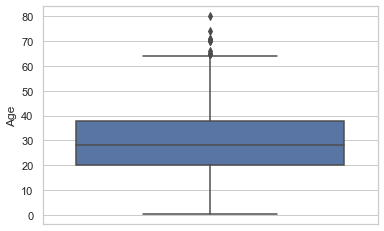

In [6]:
#ploting a boxplot of Age
sns.set(style="whitegrid")
ax = sns.boxplot(y=df["Age"])

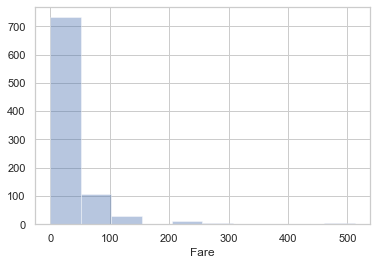

In [11]:
#plotting a histogram of fare
sns.set(style="whitegrid")
sns.distplot(df["Fare"], bins=10, kde=False, rug=False)
plt.show()

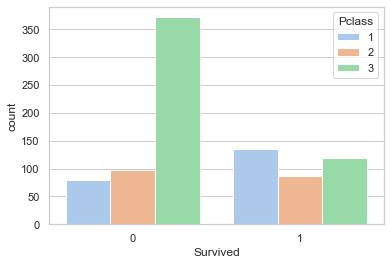

In [12]:
sns.countplot(x="Survived", hue="Pclass", palette="pastel",data=df)
plt.show()

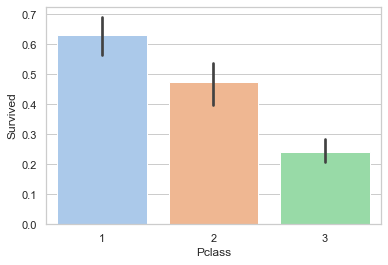

In [13]:
sns.barplot(y="Survived", x="Pclass", palette="pastel",data=df)
plt.show()

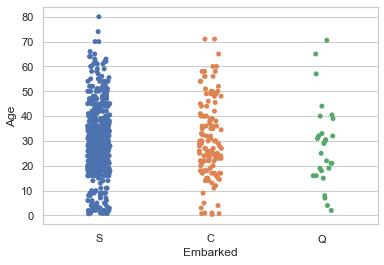

In [14]:
sns.stripplot(x="Embarked", y="Age", data=df, jitter=True)
plt.show()

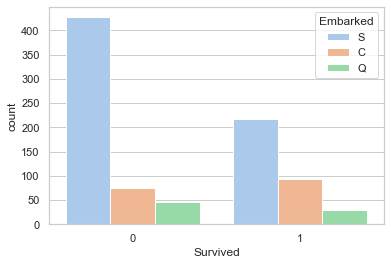

In [15]:
sns.countplot(x="Survived", hue="Embarked", palette="pastel",data=df)
plt.show()

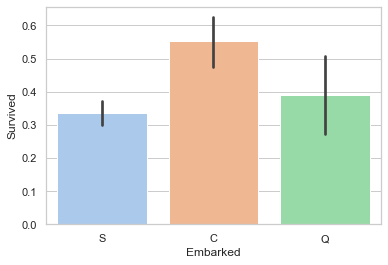

In [16]:
sns.barplot(y="Survived", x="Embarked", palette="pastel",data=df)
plt.show()

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
model_mean_age = df['Age'].mean()
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)
model_mean_age = df['Fare'].mode()[0]

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df['Cabin'].fillna('No', inplace=True)
df['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
model_embarked_mode = df['Embarked'].mode()[0]
df = df.drop(["PassengerId","Name","Ticket"],axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C


In [8]:
df_num = pd.get_dummies(df,columns=nonnumfeats)
df_num.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,1,0,0,0,1


In [24]:
#Correlation coefficients of survived with the other data
corr = df_num.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived      1.000000
Sex_female    0.543351
Cabin_Yes     0.316912
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Cabin_No     -0.316912
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


C:\Users\ahben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for the test set=79.33%


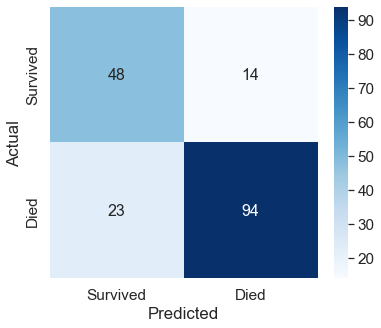

In [85]:
#Logistic Regression analysis with confusion matrix

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=69.27%


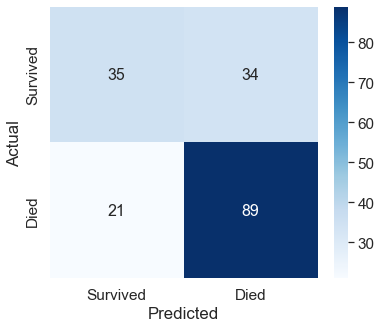

In [30]:
#KNearestNeighbors analysis with confusion matrix

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


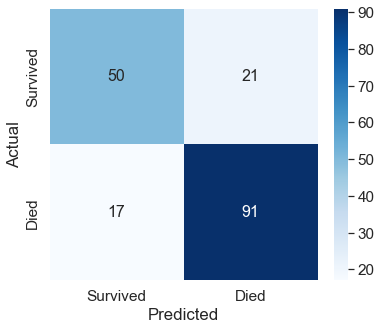

In [75]:
##Decision tree analysis with confusion matrix

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

In [47]:
#Putting together the predictions for the different models in separate csv files for kaggle

dfout1 = pd.DataFrame() 
dfout1[["PassengerId"]] = dftest[["PassengerId"]]
dfout1["Survived"] = 0
dfout1[:5]
dfout1.to_csv(r'C:\Users\ahben\OneDrive\Desktop\AP machine learning\CA 1\stupidbaseline.csv',index=False)

dftest1 = dftest.drop(["PassengerId","Name","Ticket"],axis=1)
dftest1['Age'].fillna(df['Age'].mean(), inplace=True)
dftest1['Cabin'].fillna('No', inplace=True)
dftest1['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
dftest1['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

predictdf = pd.get_dummies(dftest1,columns=nonnumfeats)
Xp = predictdf.values

yp_pred = logreg.predict(Xp)
dfout2 = pd.DataFrame() 
dfout2[["PassengerId"]] = dftest[["PassengerId"]]
dfout2["Survived"] = yp_pred
dfout2[:5]
dfout2.to_csv(r'C:\Users\ahben\OneDrive\Desktop\AP machine learning\CA 1\logregpredict.csv',index=False)

yp_pred_dtc = dtc.predict(Xp)
dfout3 = pd.DataFrame() 
dfout3[["PassengerId"]] = dftest[["PassengerId"]]
dfout3["Survived"] = yp_pred_dtc
dfout3[:5]
dfout3.to_csv(r'C:\Users\ahben\OneDrive\Desktop\AP machine learning\CA 1\dtcpredict.csv',index=False)

yp_pred_knn = knn.predict(Xp)
dfout4 = pd.DataFrame() 
dfout4[["PassengerId"]] = dftest[["PassengerId"]]
dfout4["Survived"] = yp_pred_knn
dfout4[:5]
dfout4.to_csv(r'C:\Users\ahben\OneDrive\Desktop\AP machine learning\CA 1\knnpredict.csv',index=False)

In [76]:
#hyperparam tuning (knn)

n_neighbors = [5,6,7,8,9,10]
weights = ['uniform' , 'distance']
algorithm = ['auto' , 'ball_tree' , 'kd_tree' ,'brute']
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', algorithm='auto')
parameters_knn = dict(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm)

knnCV = RandomizedSearchCV(KNNClassifierModel, parameters_knn, cv=5)
knnCV.fit(X,y)
print('score : ' , knnCV.best_score_)
print('params : ' , knnCV.best_params_)
print('best : ' , knnCV.best_estimator_)


score :  0.7318435754189945
params :  {'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'brute'}
best :  KNeighborsClassifier(algorithm='brute', n_neighbors=8, weights='distance')


Accuracy score for the test set=74.30%


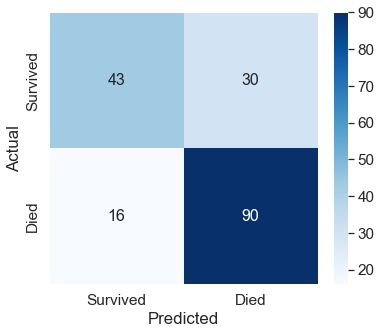

In [79]:
#knn analysis using tuned hyperparameters

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

knn = KNeighborsClassifier(weights='distance', n_neighbors=8, algorithm='brute')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

In [93]:
#hyperparam tuning (logistic regression)

penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)

LogisticRegressionModel = LogisticRegression()
parameters_logreg = dict(penalty = penalty, C=C)

logregCV = RandomizedSearchCV(LogisticRegressionModel, parameters_logreg, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
logregCV.fit(X,y)
print('score : ' , logregCV.best_score_)
print('params : ' , logregCV.best_params_)
print('best : ' , logregCV.best_estimator_)

score :  0.7979913376435881
params :  {'C': 1.6501553660121044, 'penalty': 'l2'}
best :  LogisticRegression(C=1.6501553660121044)


C:\Users\ahben\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.7889963  0.79461427 0.79461427 0.79461427 0.79012617
        nan        nan        nan        nan 0.79124349 0.79349068
        nan 0.79460172 0.79349068 0.79124976        nan        nan
 0.79572532        nan 0.79573787 0.79011989        nan 0.79124349
        nan 0.79799134 0.79235453 0.79236708 0.79236081 0.79124976
 0.79011989        nan        nan 0.79461427        nan        nan
 0.79461427 0.79124349        nan        nan 0.79124976 0.79124349
        nan        nan        nan 0.79461427 0.79236708 0.79124349
        nan 0.79011989        nan        nan 0.7934844         nan
 0.79236708        nan        nan        nan        nan        nan
 0.79574415        nan        nan        nan        nan 0.79124976
        nan        nan 0.79236708 0.79572532        nan        nan
 0.7889963  0.79235453        nan        nan 0.794626

C:\Users\ahben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for the test set=75.98%


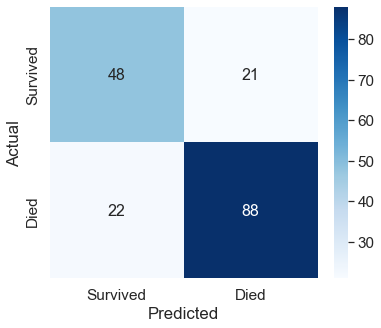

In [94]:
#Logistic regression analysis using tuned hyperparameters

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

logreg = LogisticRegression(C=1.6501553660121044, penalty='l2')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

In [96]:
#hyperparam tuning (dtc)

dtcModel = DecisionTreeClassifier()
parameters_dtc = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

dtcCV = RandomizedSearchCV(dtcModel, parameters_dtc, cv=5)
dtcCV.fit(X,y)
print('score : ' , dtcCV.best_score_)
print('params : ' , dtcCV.best_params_)
print('best : ' , dtcCV.best_estimator_)

score :  0.8013432929508506
params :  {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 5}
best :  DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)


Accuracy score for the test set=79.89%


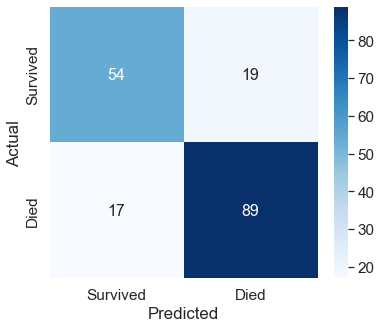

In [97]:
#dtc analysis using tuned hyperparameters

y = df_num["Survived"].values
X = df_num.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=76.19%


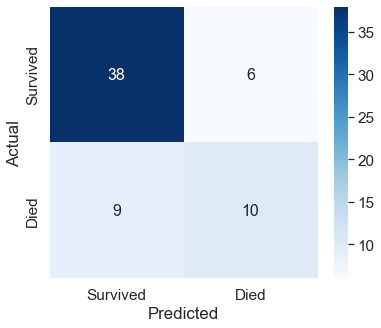

In [115]:
#dtc analysis for female only

A = df_num.drop(["Sex_male"], axis=1)
A_female = A[A.Sex_female != 0]
A_male = A[A.Sex_female == 0]

y = A_female["Survived"].values
X = A_female.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=81.03%


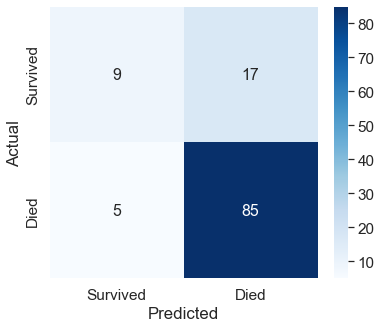

In [116]:
#dtc analysis for male only

A = df_num.drop(["Sex_male"], axis=1)
A_female = A[A.Sex_female != 0]
A_male = A[A.Sex_female == 0]

y = A_male["Survived"].values
X = A_male.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=68.18%


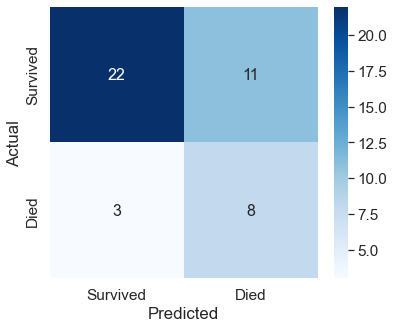

In [120]:
#dtc analysis for Class1 only

Class1 = df_num[df_num.Pclass == 1]
Class2 = df_num[df_num.Pclass == 2]
Class3 = df_num[df_num.Pclass == 3]

y = Class1["Survived"].values
X = Class1.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=89.19%


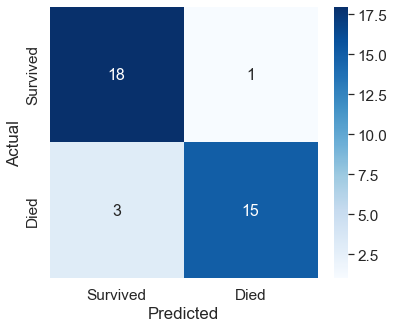

In [121]:
#dtc analysis for Class2 only

Class1 = df_num[df_num.Pclass == 1]
Class2 = df_num[df_num.Pclass == 2]
Class3 = df_num[df_num.Pclass == 3]

y = Class2["Survived"].values
X = Class2.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.79%


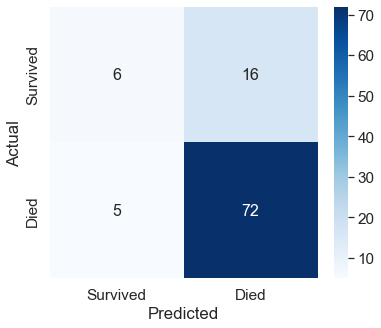

In [122]:
#dtc analysis for Class3 only

Class1 = df_num[df_num.Pclass == 1]
Class2 = df_num[df_num.Pclass == 2]
Class3 = df_num[df_num.Pclass == 3]

y = Class3["Survived"].values
X = Class3.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtc = DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=5)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

score = accuracy_score(y_test, y_pred)
print("Accuracy score for the test set={:.2f}%".format(score*100))

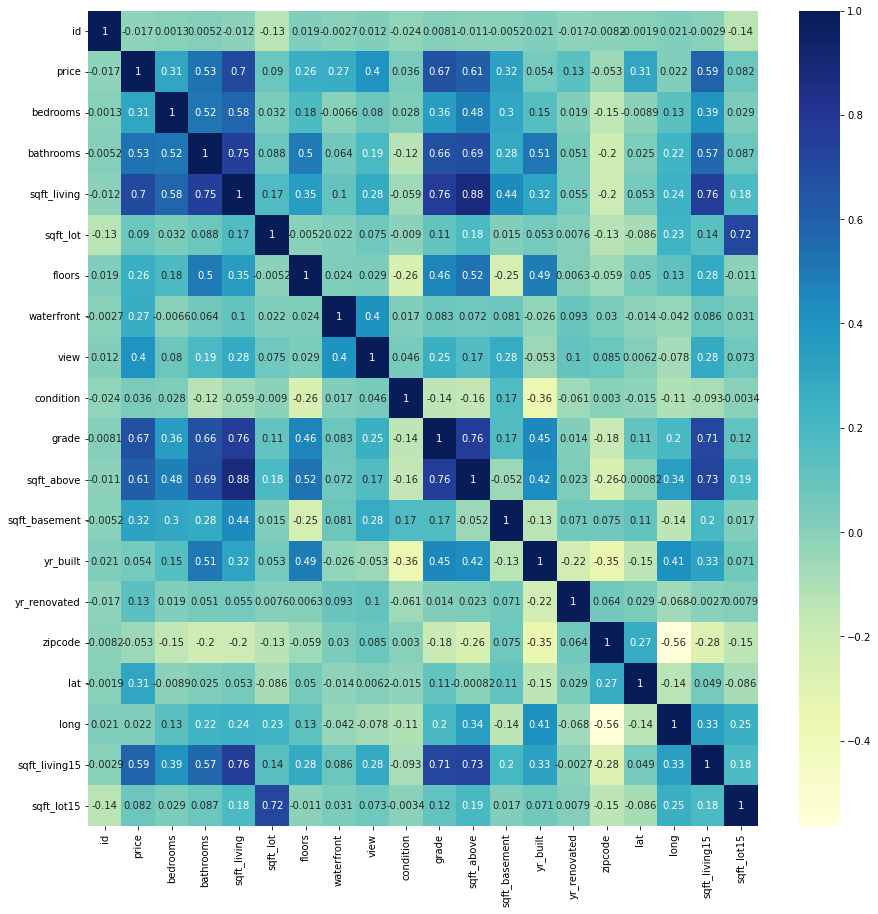

In [10]:
kchousedf = pd.read_csv("data\kc_house_data.csv")
plt.subplots(figsize=(15,15))
corr = kchousedf.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [11]:
#Corelation coefficients of price with other data

housedf = kchousedf.drop(["id","date","sqft_above","sqft_living15","sqft_lot15"],axis=1)
corr = housedf.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr["price"])

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [12]:
#Analysis using Linear regression, Ridge and Lasso

y = housedf["price"].values
X = housedf.drop(["price"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

ridgemodel = Ridge()
ridgemodel.fit(X_train, y_train)

lassomodel = Lasso()
lassomodel.fit(X_train, y_train)

Lasso()

In [13]:
#R2 score for each of the models

yhat_train_lin = linmodel.predict(X_train)
yhat_test_lin = linmodel.predict(X_test)
print("R2 Score for train(LinearRegression)={}".format(r2_score(y_train,yhat_train_lin))) # R2 score, 1.0 is best
print("R2 Score for test(LinearRegression)={}".format(r2_score(y_test,yhat_test_lin)))

yhat_train_ridge = ridgemodel.predict(X_train)
yhat_test_ridge = ridgemodel.predict(X_test)
print("R2 Score for train(Ridge)={}".format(r2_score(y_train,yhat_train_ridge))) # R2 score, 1.0 is best
print("R2 Score for test(Ridge)={}".format(r2_score(y_test,yhat_test_ridge)))

yhat_train_lasso = lassomodel.predict(X_train)
yhat_test_lasso = lassomodel.predict(X_test)
print("R2 Score for train(Lasso)={}".format(r2_score(y_train,yhat_train_lasso))) # R2 score, 1.0 is best
print("R2 Score for test(Lasso)={}".format(r2_score(y_test,yhat_test_lasso)))

R2 Score for train(LinearRegression)=0.701914315257812
R2 Score for test(LinearRegression)=0.6855275267633035
R2 Score for train(Ridge)=0.7019122833120566
R2 Score for test(Ridge)=0.6855518189100465
R2 Score for train(Lasso)=0.7019143130117067
R2 Score for test(Lasso)=0.6855278826474455


In [14]:
mean_price = y.mean()
print("mean price={}".format(mean_price))
ystupid = np.full(len(y),mean_price)
print("R2 Score for stupid baseline is={}".format(r2_score(y,ystupid)))

mean price=540088.1417665294
R2 Score for stupid baseline is=0.0


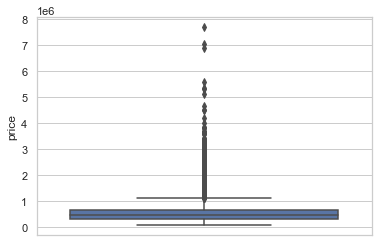

In [15]:
#Plot to show right skew

sns.set(style="whitegrid")
ax1 = sns.boxplot(y=kchousedf["price"])

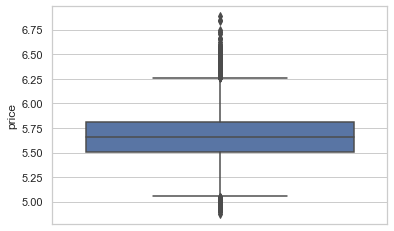

In [16]:
#plot to show more even skew after logPrice

dfout9 = pd.DataFrame() 
dfout9['price'] = np.log10(kchousedf['price'])
sns.set(style="whitegrid")
ax2 = sns.boxplot(y=dfout9["price"])

In [19]:
#R2 score for each of the models using logPrice

y = dfout9["price"].values
X = housedf.drop(["price"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

linmodel = LinearRegression()
linmodel.fit(X_train, y_train)
train_score_lin = linmodel.score(X_train, y_train)
test_score_lin = linmodel.score(X_test, y_test)

ridgemodel = Ridge()
ridgemodel.fit(X_train, y_train)
train_score_ridge = ridgemodel.score(X_train, y_train)
test_score_ridge = ridgemodel.score(X_test, y_test)

lassomodel = Lasso()
lassomodel.fit(X_train, y_train)
train_score_lasso = lassomodel.score(X_train, y_train)
test_score_lasso = lassomodel.score(X_test, y_test)


In [18]:
#R2 score for each of the models using logPrice

yhat_train_lin = linmodel.predict(X_train)
yhat_test_lin = linmodel.predict(X_test)
print("R2 Score for train using Log price (LinearRegression)={}".format(r2_score(y_train,yhat_train_lin)))
print("R2 Score for test using Log price (LinearRegression)={}".format(r2_score(y_test,yhat_test_lin)))

yhat_train_ridge = ridgemodel.predict(X_train)
yhat_test_ridge = ridgemodel.predict(X_test)
print("R2 Score for train using Log price (Ridge)={}".format(r2_score(y_train,yhat_train_ridge)))
print("R2 Score for test using Log price (Ridge)={}".format(r2_score(y_test,yhat_test_ridge)))

yhat_train_lasso = lassomodel.predict(X_train)
yhat_test_lasso = lassomodel.predict(X_test)
print("R2 Score for train using Log price (Lasso)={}".format(r2_score(y_train,yhat_train_lasso)))
print("R2 Score for test using Log price (Lasso)={}".format(r2_score(y_test,yhat_test_lasso)))

R2 Score for train using Log price (LinearRegression)=0.7671588094998207
R2 Score for test using Log price (LinearRegression)=0.7552429427809864
R2 Score for train using Log price (Ridge)=0.7671570743400975
R2 Score for test using Log price (Ridge)=0.7552540570892372
R2 Score for train using Log price (Lasso)=0.49369025459617955
R2 Score for test using Log price (Lasso)=0.484390957119077


In [109]:
#hyperparameter tuning for Lasso

params = {'alpha': (np.logspace(-8, 8, 100))}
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 5)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 2.656087782946684e-06}
0.7665140382620474


In [102]:
#hyperparameter tuning for Ridge

params = {'alpha': (np.logspace(-8, 8, 100))}
ridge = Ridge()
ridge_model = GridSearchCV(ridge, params, cv = 5)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.0014849682622544665}
0.7663839241534645


In [21]:
#Lasso analysis using optimum hyperparameters

y = dfout9["price"].values
X = housedf.drop(["price"],axis=1).values

lassomodel = Lasso(alpha=2.656087782946684e-06)
lassomodel.fit(X_train, y_train)
train_score_lasso = lassomodel.score(X_train, y_train)
test_score_lasso = lassomodel.score(X_test, y_test)
print(train_score_lasso)
print(test_score_lasso)


0.7671587687276555
0.7552432085404771


In [22]:
#Ridge analysis using optimum hyperparameters

y = dfout9["price"].values
X = housedf.drop(["price"],axis=1).values

ridgemodel = Ridge(alpha=0.0014849682622544665)
ridgemodel.fit(X_train, y_train)
train_score_ridge = ridgemodel.score(X_train, y_train)
test_score_ridge = ridgemodel.score(X_test, y_test)
print(train_score_ridge)
print(test_score_ridge)

0.7671588094959602
0.7552429620131564
